In [1]:
from PIL import Image
import torch
from torchvision import transforms
import numpy as np
from scipy import ndimage
import matplotlib.pyplot as plt
import cv2
import os, sys

/home/ludoboz/.local/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/usr/lib/python3/dist-packages/requests/__init__.py:89: RequestsDependencyWarning: urllib3 (1.26.12) or chardet (3.0.4) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({}) doesn't match a supported "


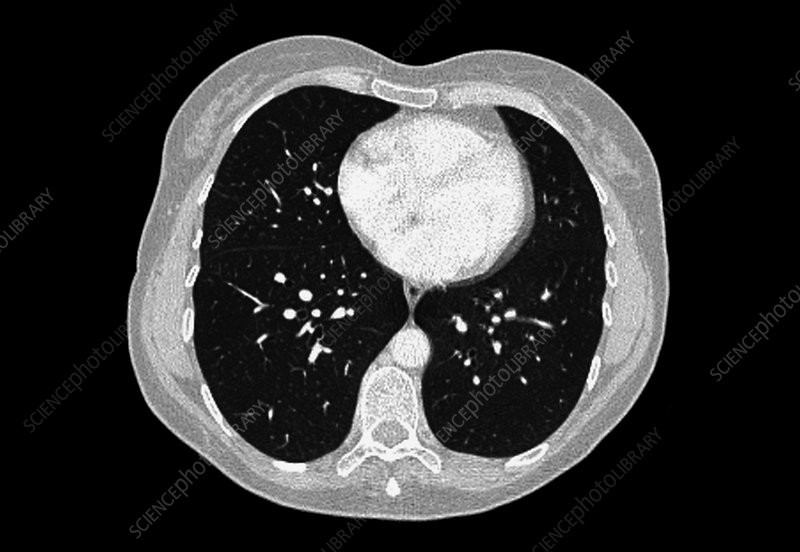

In [17]:
im = Image.open("Data/train/normal/6.png")
im.show()

In [18]:
convert_tensor = transforms.ToTensor()
a = convert_tensor(im)
a.shape

torch.Size([3, 552, 800])

In [5]:
# box = (500, 528, 528, 556)
# cropped_image = im.crop(box)
# convert_tensor(cropped_image)

In [6]:
# def quarter_res_drop(im):

#     resized_image = im[0::35, 0::35]
#     cv2.imwrite('resize_result_image.png', resized_image)

#     return resized_image

# b = a.numpy()
# q = quarter_res_drop(b[0])
# print(q.shape)
# plt.imshow(q, cmap = 'gray')

In [23]:
path = "Data/train/normal/"
dirs = os.listdir(path)
save_dir = 'Resized/'

def downsampling(dirs, path, save_dir): 

    img = [] 

    for i, item in enumerate(dirs):
        if os.path.isfile(path+item):

            im = Image.open(path+item)
            imResize = im.resize((28, 28))            
            imResize.save(save_dir + f'resized_{i}.png')

            convert_tensor = transforms.ToTensor() 
            ten_im = convert_tensor(imResize)
            img.append(ten_im)

    return img

tensor_images = downsampling(dirs, path, save_dir)
tensor_images[0].shape

torch.Size([4, 28, 28])

In [8]:
# dirs1 = os.listdir(save_dir)
# img = []

# def from_img_to_tensor(dirs1):    
#     for i, item in enumerate(dirs1):
#         if os.path.isfile(save_dir + item):
#             convert_tensor = transforms.ToTensor()            
#             ten_im = convert_tensor(im)
#             img.append(ten_im)
#     return img